In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np
print(np.column_stack(([1,2,3], [4,5,6])))

fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[1 4]
 [2 5]
 [3 6]]
[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [2]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [4]:
#scikit-learn으로 훈련세트와 테스트 세트로 데이터 섞어 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
# 특정 클래스의 비율이 적을때
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target ,random_state=42)
print(train_input)
print(test_input)

print(train_target)
print(test_target)

[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]
[[ 11.    9.7]
 [ 11.8   9.9]
 [ 29.7 450. ]
 [ 11.8  10. ]
 [ 26.5 340. ]
 [ 12.4  13.4]
 [ 34.  685. ]
 [ 34.  575. ]
 [ 38.5 920. ]
 [ 35.  680. ]
 [ 26.3 290. ]
 [ 31.  500. ]
 [ 41.  950. ]]
[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier() # k-nearest neibors Classs

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [29]:
print(kn.predict([[25, 150]]))

[0.]


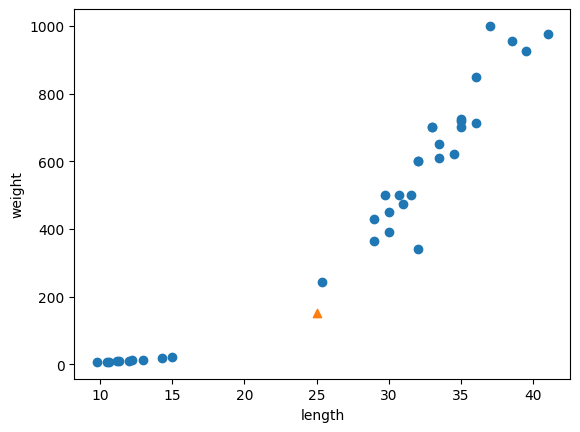

In [30]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [31]:
distances, indexes = kn.kneighbors([[25, 150]])

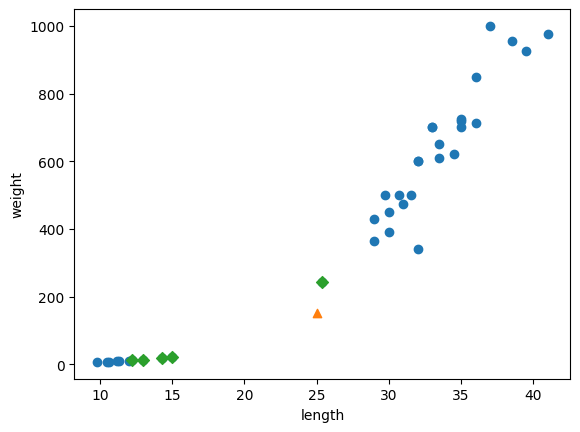

In [32]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [33]:
print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


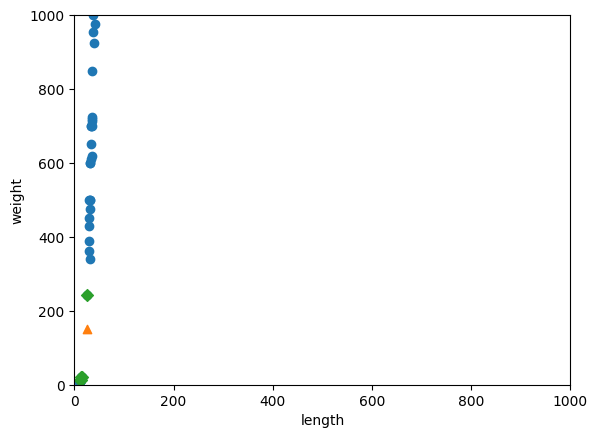

In [34]:
# scale 맞추기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="D")
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

---
* ML에서 data preprocessing의 의미 : 데이터의 featue들을 일정한 기준으로 맞춘다.
* 표준점수(z score) : 각 데이터 값에서 전체 평균을 빼고, 표준 편차로 나눈다


In [16]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)
print(type(mean))
print(type(std))

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
train_scaled = (train_input - mean) / std
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


In [20]:
new = ([25, 150] - mean) / std
print(type(new))

<class 'numpy.ndarray'>


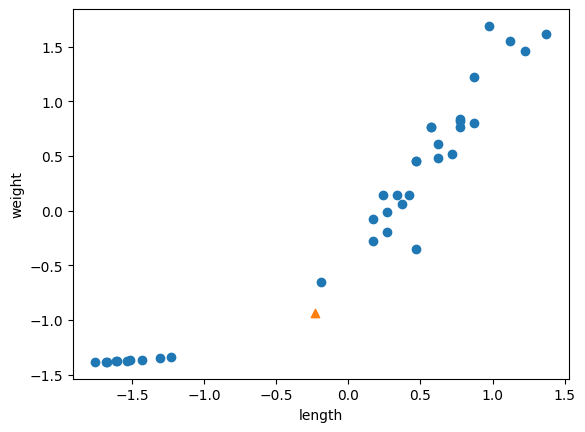

In [41]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [35]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [36]:
test_scaled = (test_input - mean) / std

In [37]:
kn.score(test_scaled, test_target)

1.0

In [38]:
print(kn.predict([new]))

[1.]


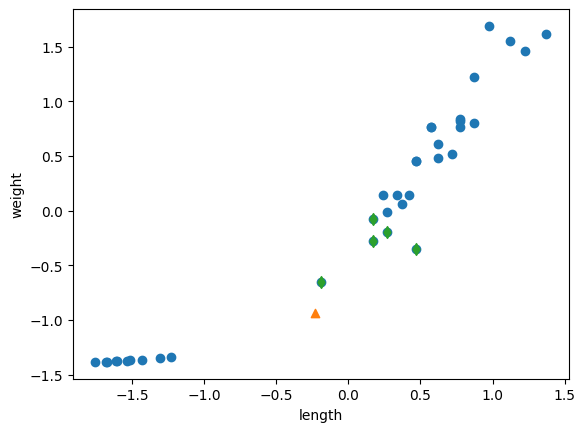

In [42]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="^")
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker="d")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()